<a href="https://colab.research.google.com/github/Swastik02aug/SML-Regression-Capstone-Project/blob/main/project(yes_bank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

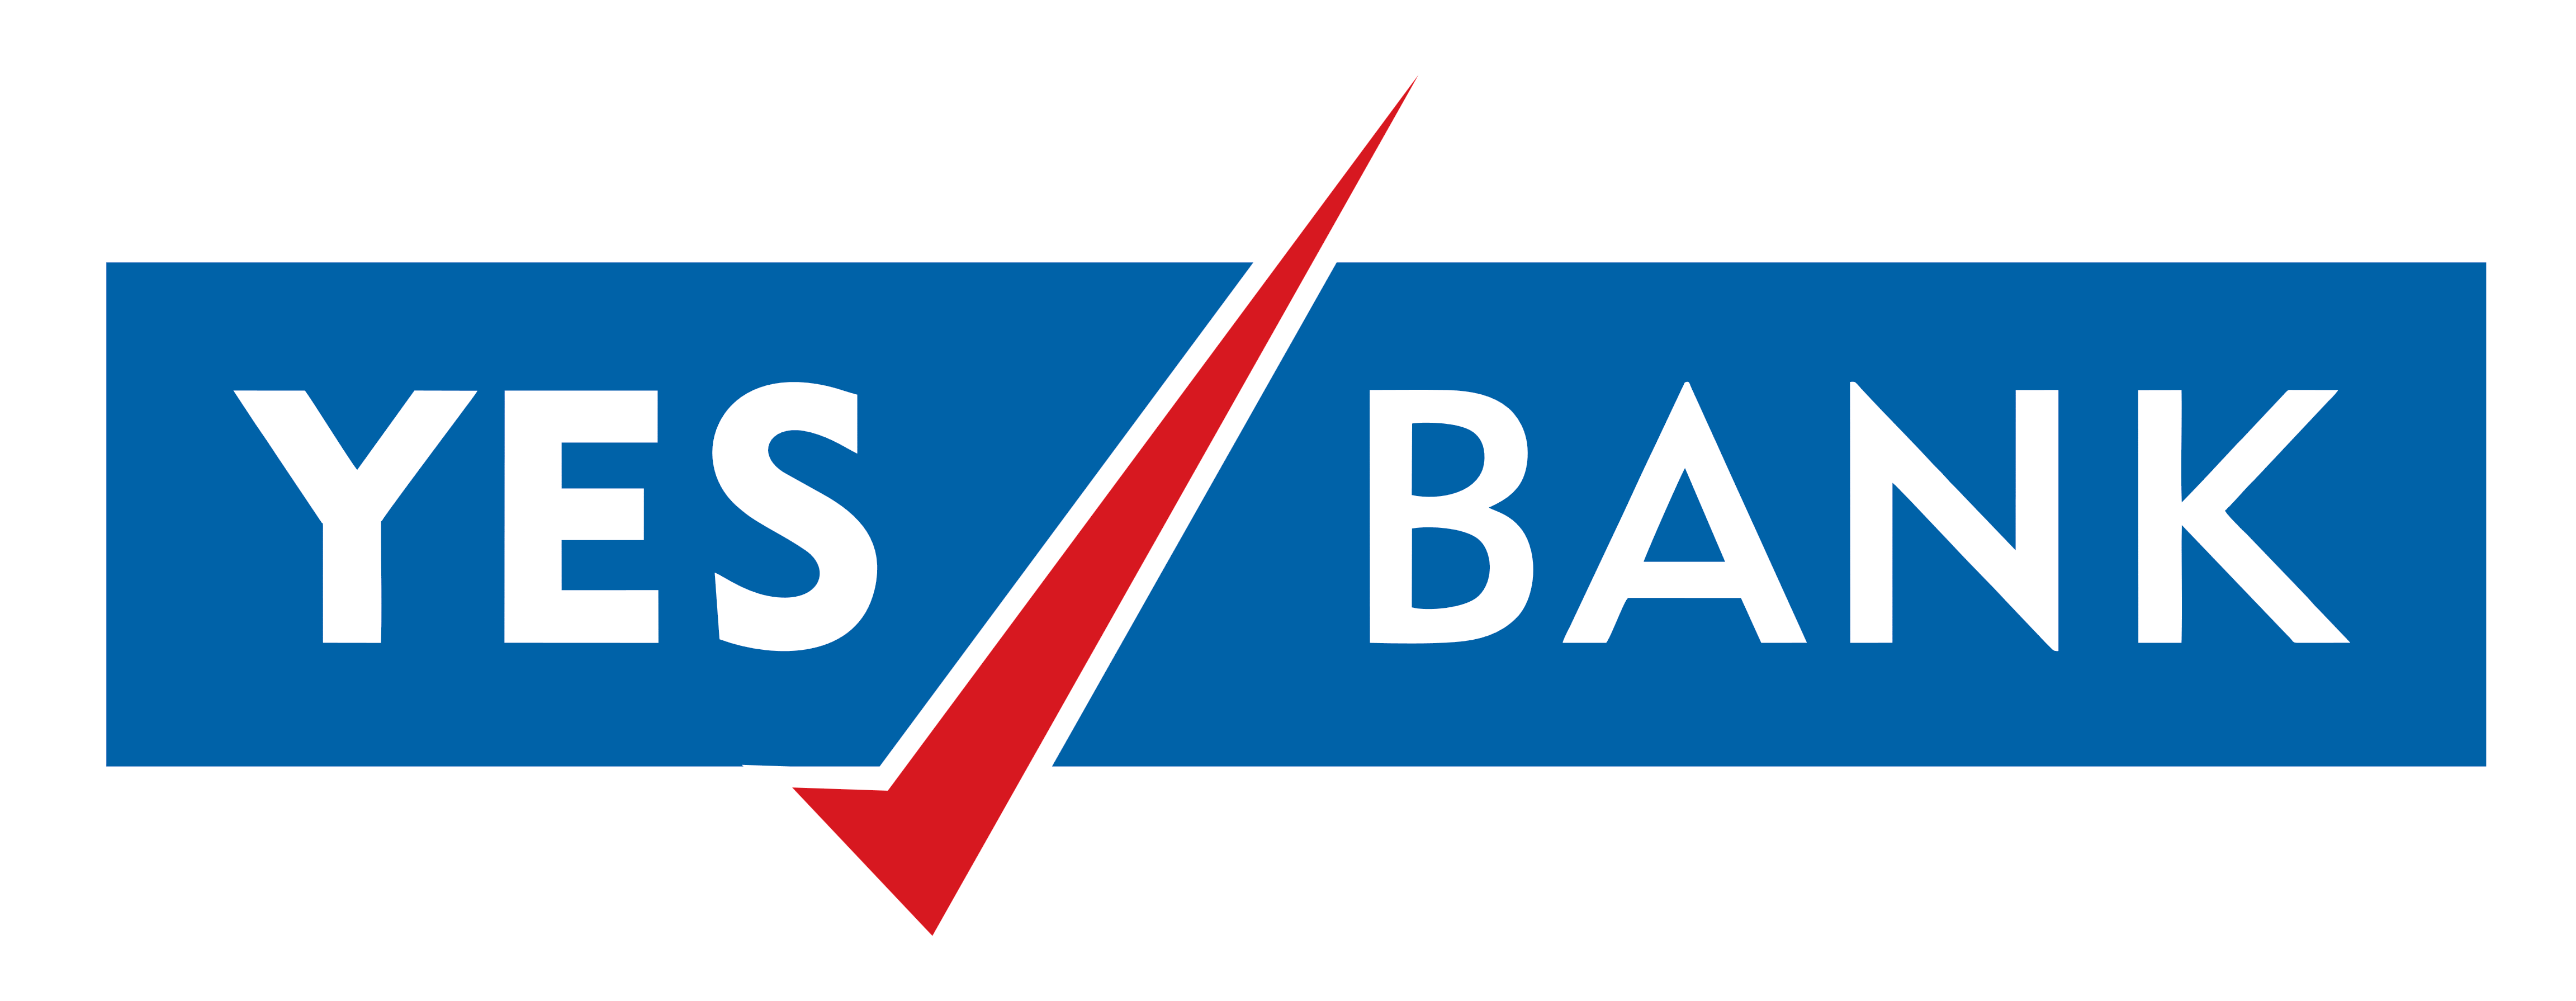

# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**
# (Supervised - Regression)

 Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.


# **Importing all required libraries.**

In [83]:
# Importing Required Library

# numerical computations
import numpy as np 

# data manipulations
import pandas as pd 

# visualize with plots
import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns

# mathematical operations
from numpy import math  

#scaling of the data
from sklearn.preprocessing import MinMaxScaler 
from scipy.stats import zscore

# split train and test data
from sklearn.model_selection import train_test_split 

# linear regression
from sklearn.linear_model import LinearRegression 
     
# import required metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [84]:
#mounting drive for importing data set from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/capstone project 2(yes bank)/data_YesBank_StockPrices.csv')

**Data exploration:**

In [86]:
#HEAD FUCTION IS USED TO PRINT OUT THE FIRST FIVE ROWS OF THRE DATA SETS
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
#DESCRIBE METHOD IS USE PROVIDES THE COUNT ,MEAN,MEDIAN,,STD,MIN ETC VALUES
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [6]:
#NUNIQUE IS USED TO PROVIDES THE NUMBERS OF UNIQUES VALUES PRESENT IN EACH COLUMN
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [7]:
#DTYPES IS USED TO PROVIDES DATA TYPES OF EACH COLUMN VALUE
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [8]:
#INFO IS USED TO PROVIDES COUNT,DTYPE,AND NULL OR NON COLUMN VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
#IT IS USED TO FIND OUT THE SUM OF ALL NULL VALUES
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**->**From the given data set we find that there is no null values are present .

In [10]:
#IT IS USED TO FIND OT THE NUMBERS OF ROWS AND COLUMN OF THE DATA
df.shape

(185, 5)

Since, we've seen the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

Open - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

High - The high is the highest price at which a stock traded during a period.

Low -The low is the highest price at which a stock traded during a period.

Close -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

# **Wrangling of data:**

Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

Objectives:

Handle missing values

Correct data format

Standardize and normalize data

In [11]:
#Looking for duplicates in dataset
len(df[df.duplicated()])

0

Hence there is no duplicate value present in dataset. 

The Given Date in data is format of Month-YY. We need to convert in proper date format of YYYY-MM-DD.

In [12]:
# convert string object to datetime object
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [13]:
#check dtype of date now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Now the given date are coverted into datetime format.

# **Checking the Outlier**

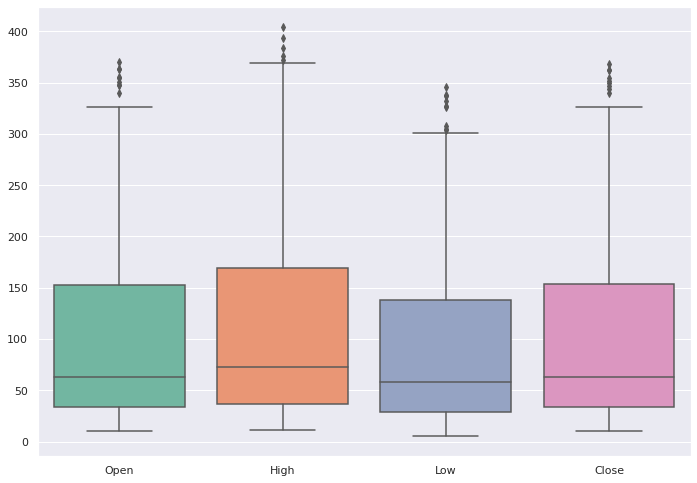

In [14]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=df, orient="v", palette="Set2")

# **EDA :Exploratory Data Analysis:**

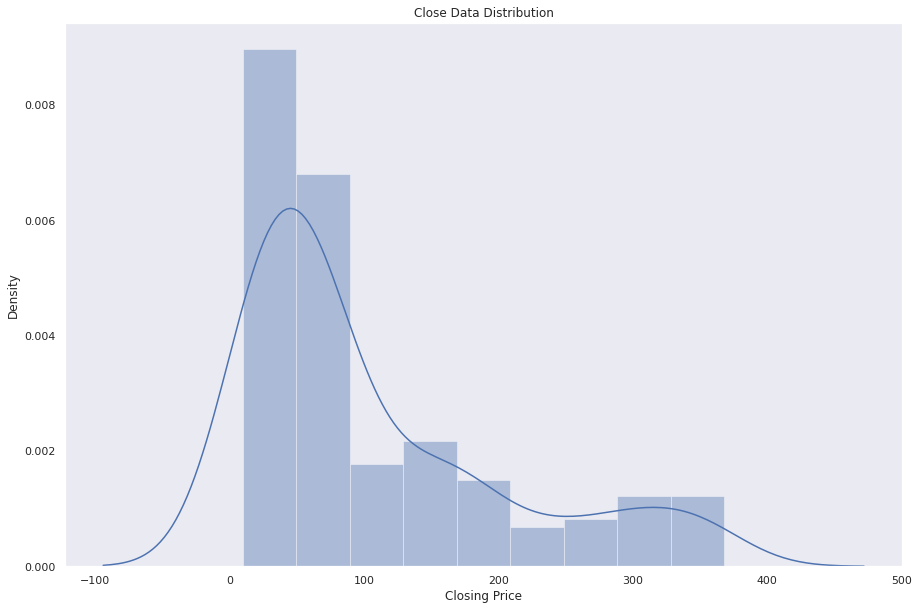

In [15]:
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(df['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.grid()
plt.show()

**->**From the distribution plot of the dependent variable 'close' price we find that 'close' price distribution curve is right skewed.

**Applying log transformation to make it normal distribution.**

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

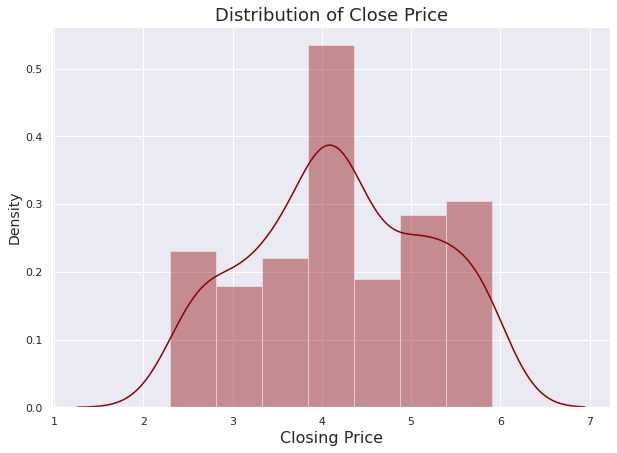

In [16]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (10,7))
sns.distplot(np.log(df['Close']), color = 'darkred')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

Now, distribution of closing price is more normal, after applying log transformation

# **Independent Variables Open , High and Low price of stock**

Plotting distribution of Open , High and Low numerical Features

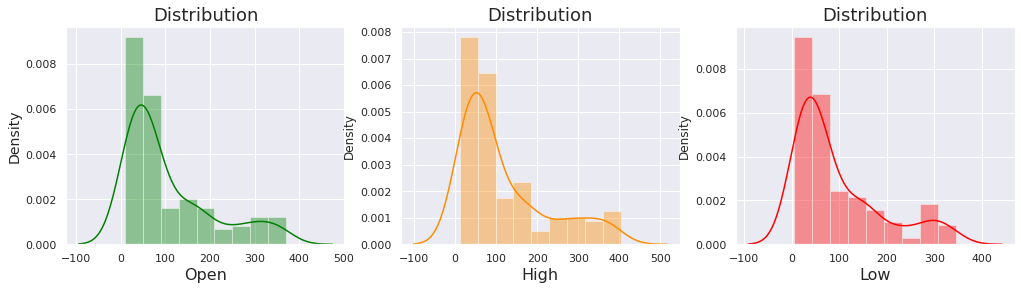

In [96]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(df['Open'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(df['High'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(df['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

It's looking like rightly skewed for all features.

**Again applying log transformation to make it normal distribution.**

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

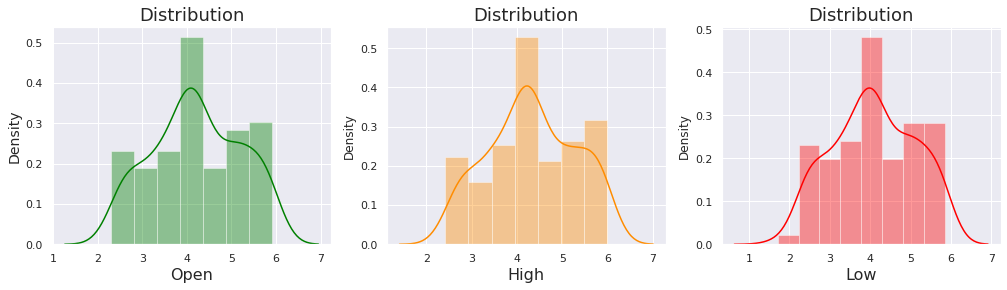

In [18]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(np.log(df['Open']), color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(np.log(df['High']), color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(np.log(df['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)

plt.show()

Now, It looks like Normally Distributed of Open, High and Low Feature.

**Now find out the realation between the Dependent Variable and independent Variable**

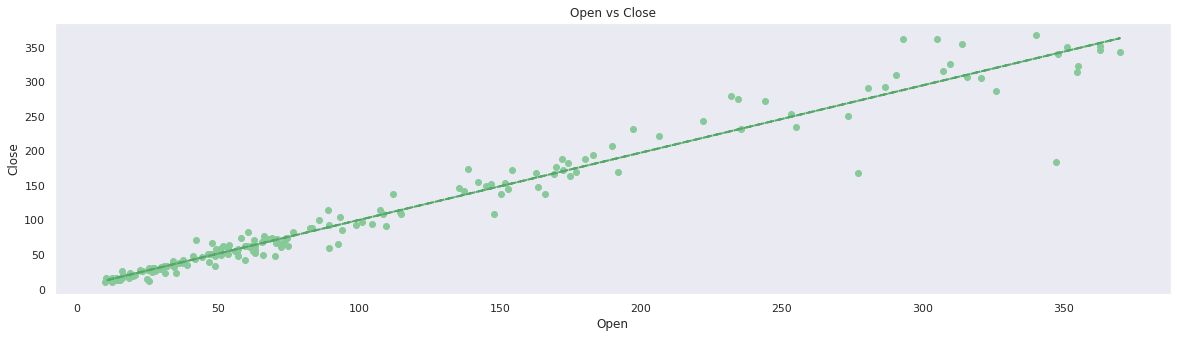

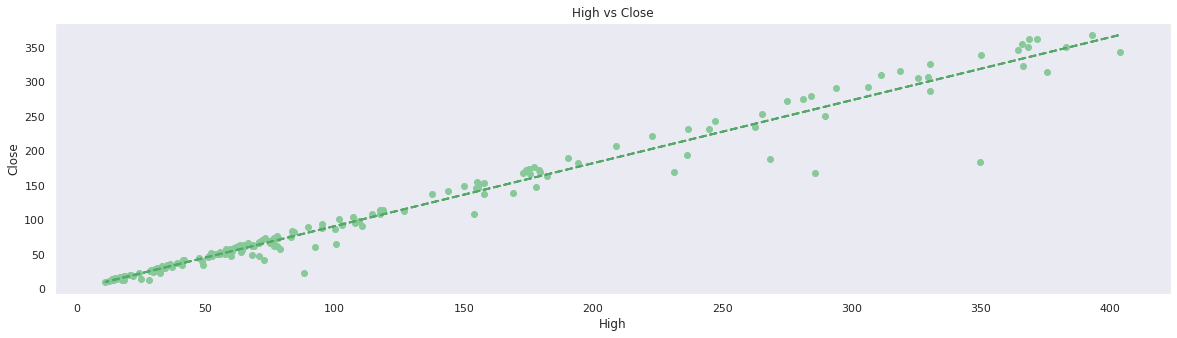

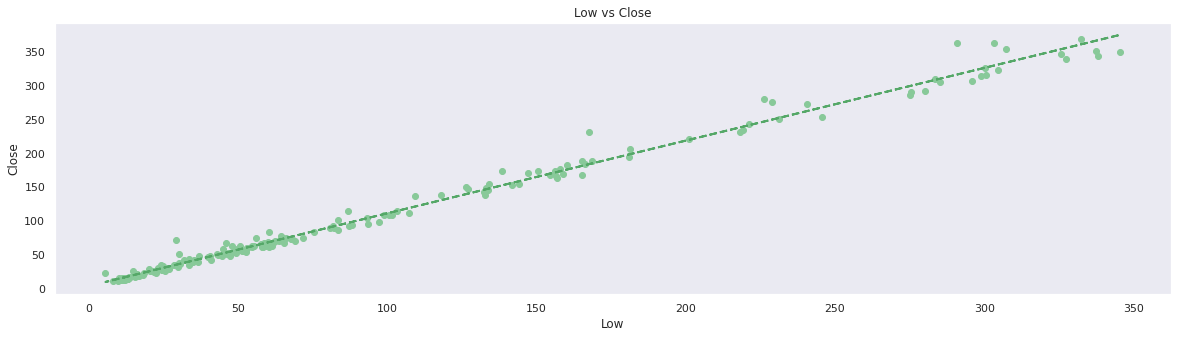

In [97]:
# scatter plot to see the relationship between dependent & independent variables
for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()

  plt.scatter(df[col], df['Close'], color = '#88c999')
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))

  z = np.polyfit(df[col],df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "g--", lw=2)
  plt.grid()

  plt.show()

**->**From all the scatter plot we find that each independent variable are changes linearly with dependent variable.

# **Correlation**

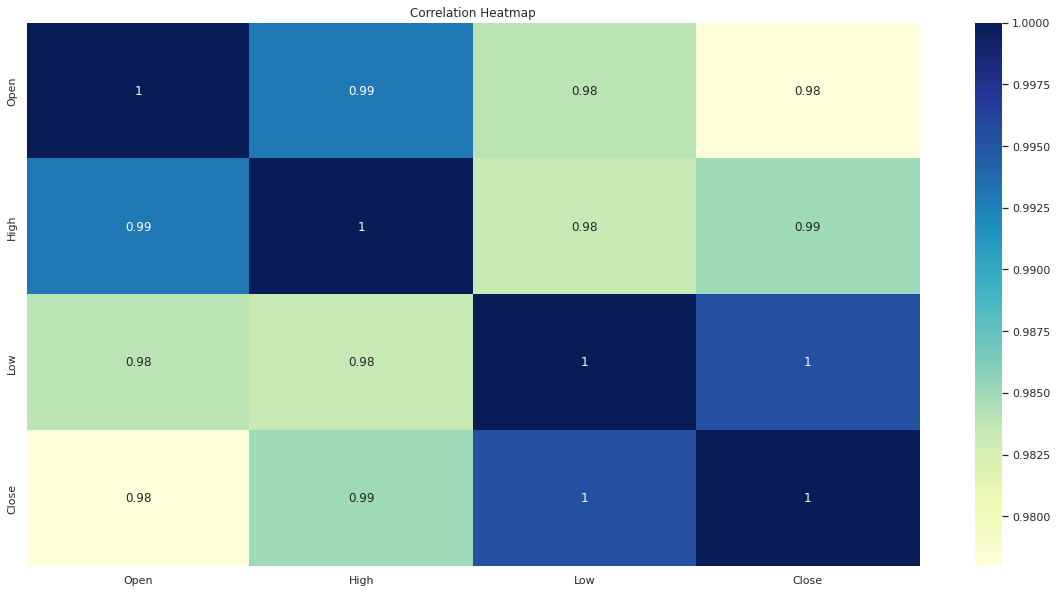

In [98]:
# check for existence of corelation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor=df.corr()
sns.heatmap(abs(cor), annot = True, cmap='YlGnBu')

**->**From the heat map we find correlation between the independent variables.

**->**Hence all the independent variable are highly correlated with each other,so we takes any one variables from them.

**Variance Inflation Factor (VIF) values of Independent Variables.**

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [99]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)

calculate_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values

We have the very High VIF of Open, High, Low features in our dataset so we have to drop them which is least correlated with dependent variable

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

# **Feature engineering**

In [100]:
# Creating a new feature based on average of other features in the dataset
df['im'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,im
0,Jul-05,13.00,14.00,11.25,12.46,12.75
1,Aug-05,12.58,14.88,12.55,13.42,13.34
2,Sep-05,13.48,14.87,12.27,13.30,13.54
3,Oct-05,13.20,14.47,12.40,12.99,13.36
4,Nov-05,13.35,13.88,12.88,13.41,13.37


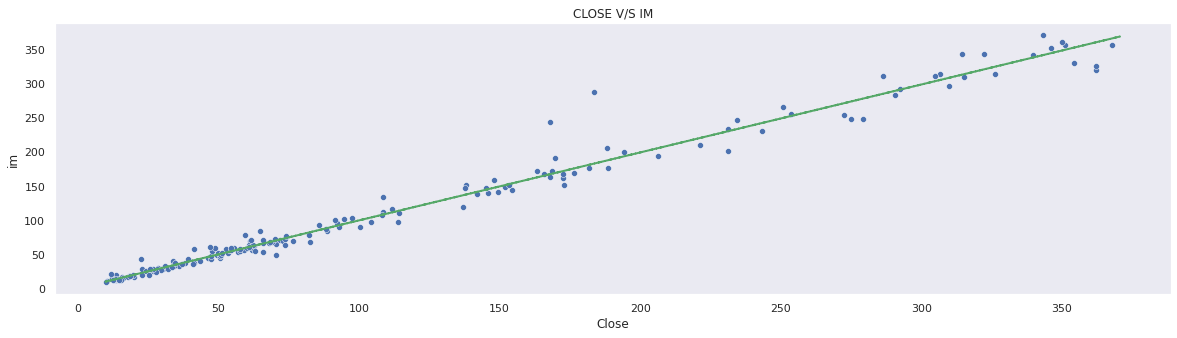

In [101]:
#ploting the scatter plot b/w dependent and independent variables
plt.figure(figsize=(20,5))
plt.title('CLOSE V/S IM')

sns.scatterplot(df['Close'],df['im'])

z = np.polyfit(df['im'],df['Close'], 1)
y_hat = np.poly1d(z)(df['im'])
plt.plot(df['im'], y_hat, "g--", lw=2)
plt.grid()
plt.show()


**->**scatter plot is used to represent the linearity between the dependent and independent variables.

->And linearity between the 'im' and 'close'is high.

To reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model. This is a good solution when each predictor contributes to predict the dependent variable.

# **Model Development**
A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

## **Train test split**



Splitting Data

X = Independent Variable

y = Dependent Variable

In [102]:
# Splitting our data into Dependent and Independent Variables

In [103]:
# choose appropriate dependent and independent variables
y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [104]:
# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [105]:
# Shape of the Training and Test dataset
print("Shape of the X_train dataset :",X_train.shape)
print("Shape of the X_test dataset :",X_test.shape)
print("Shape of the y_train dataset :",y_train.shape)
print("Shape of the y_test dataset :",y_test.shape)

Shape of the X_train dataset : (148, 1)
Shape of the X_test dataset : (37, 1)
Shape of the y_train dataset : (148,)
Shape of the y_test dataset : (37,)


**We will build these regression models for our data.**

Linear Regression

Ridge Rigression

Lasso Rigression

Elastic Net Regression

XG Boost Regrression

By using Cross-Validation, we will able to get more metrics and draw important conclusion both about our algorithm and our data.

**Implementing linear regression model**

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

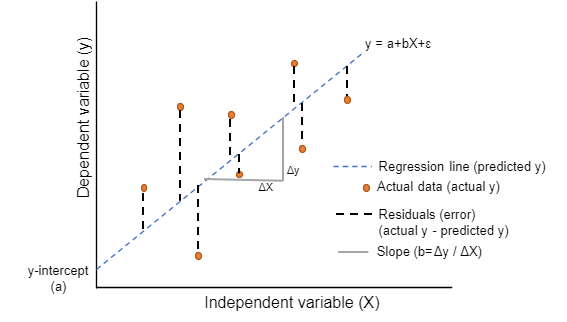

In [106]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [107]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train), 2)

0.81

In [108]:
# Test accuracy of linear regression model
round(regressor.score(X_test, y_test), 2)

0.82

In [109]:
#prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([1.51346269, 1.5297718 , 1.64711971, 1.4761459 , 2.0334514 ,
       2.74674186, 1.64855647, 1.5139675 , 1.53082024, 1.62339384,
       2.08420379, 1.60988058, 1.47133083, 2.61910368, 1.70264834,
       1.61259877, 1.5225492 , 1.96479782, 1.79914389, 1.75495398,
       1.53291713, 1.48414513, 1.83793627, 1.6271993 , 2.05383778,
       1.48888254, 1.47777681, 1.60762837, 1.53540233, 1.67806818,
       2.38332058, 2.78231124, 1.69367833, 2.37314681, 1.77009815,
       1.62036501, 2.31315259])

In [110]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [111]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [112]:
test_Dataset['Predicted Closing Price']= y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.513463
179,1.408240,1.529772
66,1.720903,1.647120
40,1.088490,1.476146
166,2.170115,2.033451


In [113]:
# Test Performance of Linear Regregression

print("MSE value-lr :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE value-lr :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("MAE value-lr :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE value-lr :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2-lr score :", round(r2_score(y_test, y_pred),4))

MSE value-lr : 0.0322
RMSE value-lr : 0.1794
MAE value-lr : 0.1522
MAPE value-lr : 0.0957
r2-lr score : 0.8191


Text(0, 0.5, 'Predicted test value')

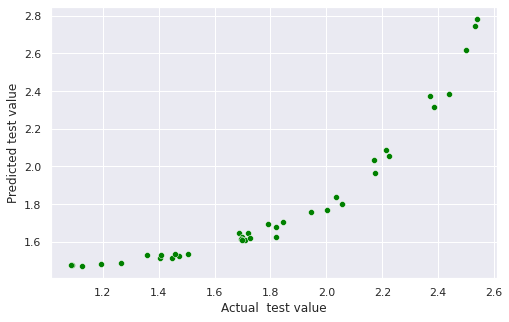

In [114]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test, y_pred,color='green')
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

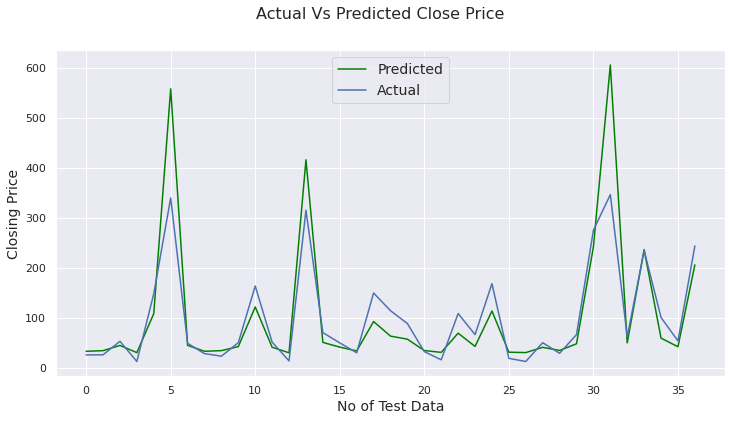

In [115]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(12,6))
plt.plot(10**(y_pred),color='green')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize =16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid(True)

# **Ridge and Lasso Regression**
Ridge and Lasso Regression are types of Regularization techniques
Regularization techniques are used to deal with overfitting and when the dataset is large.

Ridge and Lasso Regression involve adding penalties to the regression functi

# **Implementing lasso regression**
Lasso Regression
LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)
Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

α = 0: Same coefficients as simple linear regression
α = ∞: All coefficients zero (same logic as before)
0 < α < ∞: coefficients between 0 and that of simple linear regression
Yes its appearing to be very similar to Ridge till now. But just hang on with me and you’ll know the difference by the time we finish.

In [37]:
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.005, max_iter = 3000)
lasso1.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [38]:
# Accuracy of lasso regression model
round(lasso1.score(X_train, y_train), 4)

0.8109

In [39]:
# prediction of train data
y_pred_lasso = lasso1.predict(X_test)
y_pred_lasso

array([1.5176349 , 1.53373309, 1.64956336, 1.48080072, 2.03089869,
       2.7349643 , 1.65098153, 1.51813318, 1.53476797, 1.62614433,
       2.08099471, 1.61280584, 1.47604793, 2.60897684, 1.70437385,
       1.61548887, 1.52660389, 1.963133  , 1.79962144, 1.75600302,
       1.53683774, 1.4886965 , 1.83791212, 1.62990058, 2.05102142,
       1.49337264, 1.48241054, 1.61058276, 1.53929079, 1.68011158,
       2.37624309, 2.77007368, 1.69551984, 2.36620089, 1.77095134,
       1.62315467, 2.30698256])

In [40]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [116]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0324
RMSE : 0.1799
MAE : 0.1525
MAPE : 0.0962
R2 : 0.8182


Text(0, 0.5, 'Predicted Value')

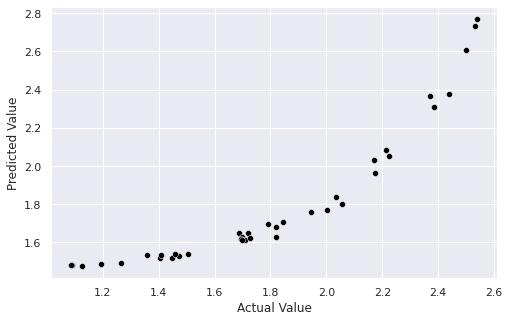

In [42]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test, y_pred_lasso,color='black')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

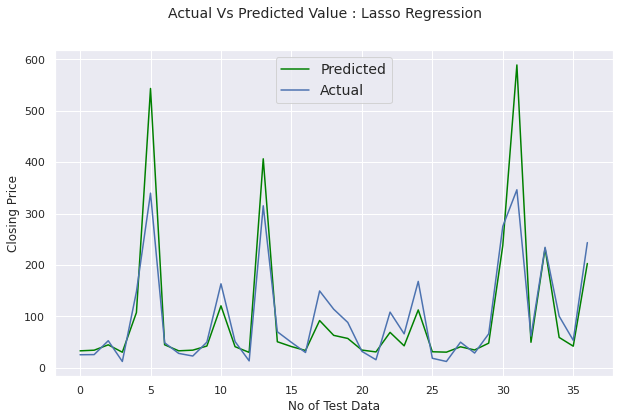

In [44]:
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,6))
plt.plot(10**(y_pred_lasso),color='green')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Lasso Regression', fontsize = 14)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid(True)

**📈Implemeting Cross Validation of Lasso**

Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

To overcome over-fitting problems, we use a technique called Cross-Validation.

Let’s dive deep and learn about some of the model evaluation techniques.

In [46]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [47]:
# Hyper parameter of Tuning For Lasso Regression

lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.001
 The negative mean squared error is :  -0.0352


In [49]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.5176349 , 1.53373309, 1.64956336, 1.48080072, 2.03089869,
       2.7349643 , 1.65098153, 1.51813318, 1.53476797, 1.62614433,
       2.08099471, 1.61280584, 1.47604793, 2.60897684, 1.70437385,
       1.61548887, 1.52660389, 1.963133  , 1.79962144, 1.75600302,
       1.53683774, 1.4886965 , 1.83791212, 1.62990058, 2.05102142,
       1.49337264, 1.48241054, 1.61058276, 1.53929079, 1.68011158,
       2.37624309, 2.77007368, 1.69551984, 2.36620089, 1.77095134,
       1.62315467, 2.30698256])

In [50]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [117]:
# Test performance

print("MSE-lasso :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE-lasso :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE-lasso :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE-lasso :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2-lasso :",round(r2_score(y_test, y_pred_lasso), 4))

MSE-lasso : 0.0324
RMSE-lasso : 0.1799
MAE-lasso : 0.1525
MAPE-lasso : 0.0962
R2-lasso : 0.8182


Text(0, 0.5, 'Predicted Value')

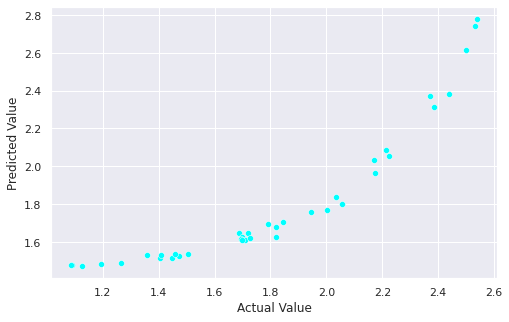

In [52]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_lasso1),color='aqua')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

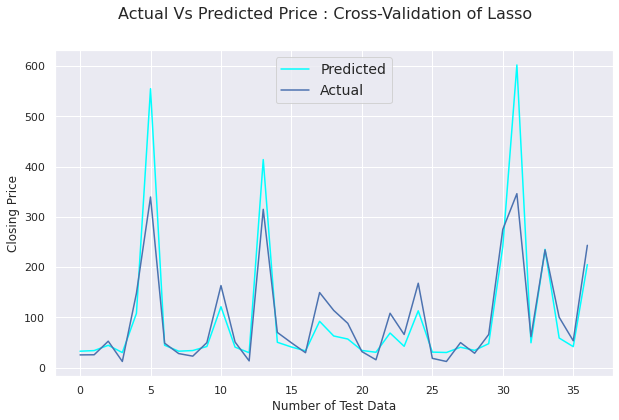

In [53]:
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1),color='aqua')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price : Cross-Validation of Lasso', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid(True)

# **Implementing ridge regression**

Ridge Regression:
As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

Objective = RSS + α * (sum of square of coefficients)
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

α = 0:

The objective becomes same as simple linear regression.
We’ll get the same coefficients as simple linear regression.

α = ∞:

The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.

0 < α < ∞:

The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

I hope this gives some sense on how α would impact the magnitude of coefficients. One thing is for sure that any non-zero value would give values less than that of simple linear regression. By how much? We’ll find out soon. Leaving the mathematical details for later, lets see ridge regression in action on the same problem as above.

In [54]:
# fit data into ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [55]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 2)

0.81

In [56]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51367737, 1.52997562, 1.64724544, 1.47638541, 2.03332006,
       2.74613587, 1.64868124, 1.51418184, 1.53102337, 1.62353536,
       2.08403867, 1.6100311 , 1.47157354, 2.61858262, 1.70273712,
       1.61274747, 1.52275782, 1.96471216, 1.79916846, 1.75500795,
       1.53311886, 1.48437931, 1.83793503, 1.62733829, 2.05369287,
       1.48911357, 1.47801523, 1.60778038, 1.5356024 , 1.67817332,
       2.38295643, 2.78168159, 1.69377308, 2.37278942, 1.77014205,
       1.62050855, 2.31283512])

In [57]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [58]:
# Test Performance
print("MSE score:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE score:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 score:", round(r2_score(y_test, y_pred_ridge), 4))

MSE score: 0.0322
RMSE score: 0.1795
MAE score: 0.1522
MAPE score: 0.0957
R2 score: 0.8191


Text(0, 0.5, 'Predicted Value')

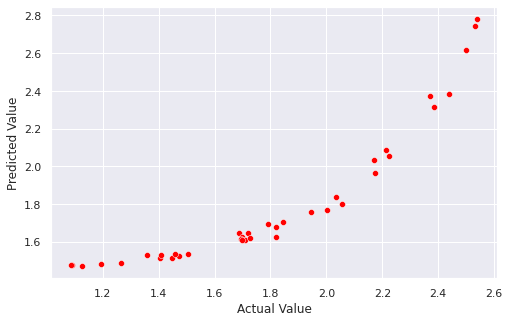

In [59]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(y_test,y_pred_ridge,color='red')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

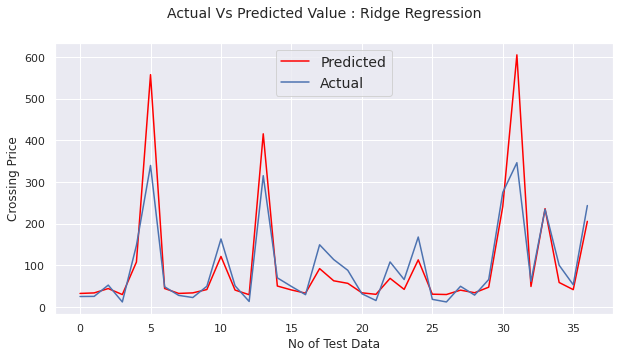

In [60]:
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge),color='red')
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value : Ridge Regression', fontsize= 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No of Test Data', fontsize = 12)
plt.ylabel('Crossing Price', fontsize= 12)
plt.grid(True)

# **Implementing Cross Validation Of Ridge**
Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

To overcome over-fitting problems, we use a technique called Cross-Validation.
Let’s dive deep and learn about some of the model evaluation techniques.

In [61]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [62]:
# Hyperparameter of tunning
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [63]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [64]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative MSE(mean squared error) score is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 1
 The negative MSE(mean squared error) score is : -0.035


In [65]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.51559664, 1.53179786, 1.64836955, 1.47852668, 2.03214578,
       2.74071804, 1.64979681, 1.5160981 , 1.53283937, 1.62480063,
       2.08256246, 1.61137675, 1.47374346, 2.61392415, 1.70353088,
       1.61407696, 1.52462303, 1.96394632, 1.79938814, 1.75549053,
       1.53492239, 1.486473  , 1.83792392, 1.62858091, 2.05239731,
       1.49117907, 1.48014681, 1.60913944, 1.53739114, 1.67911331,
       2.37970069, 2.77605215, 1.6946202 , 2.36959421, 1.77053453,
       1.62179183, 2.30999683])

In [66]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [118]:
# Test Performance
print("MSE-rp score:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE-rp score:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE-rp score:", round(mean_absolute_error(y_test, y_pred_ridge1), 2))
print("MAPE-rp score:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2-rp score:", round(r2_score(y_test, y_pred_ridge1), 4))

MSE-rp score: 0.0323
RMSE-rp score: 0.1796
MAE-rp score: 0.15
MAPE-rp score: 0.0959
R2-rp score: 0.8187


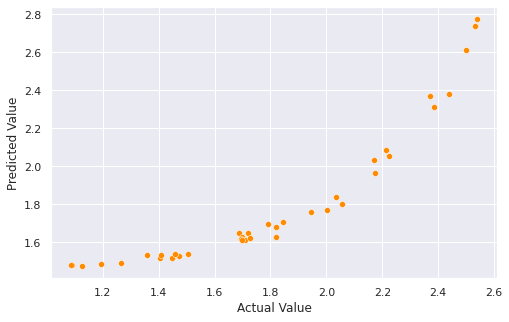

In [68]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test), (y_pred_ridge1),color='darkorange')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

Ridge Predication vs Actual (After Cross-Validation)

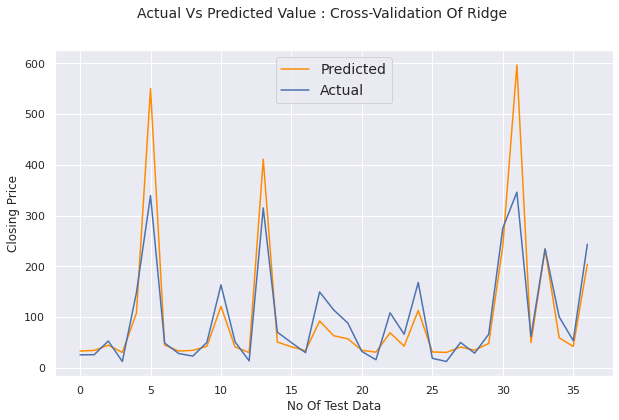

In [69]:
# actual Price Vs Predicted Price for ridge regression
predicted = 10**(y_pred_ridge1)
Actual = 10**(np.array(y_test))
plt.figure(figsize=(10,6))
plt.plot(predicted,color='darkorange')
plt.plot(Actual)
plt.suptitle('Actual Vs Predicted Value : Cross-Validation Of Ridge ', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid(True)


# **Implementing elasticnet regression**
Elastic Net is a regression method that performs variable selection and regularization both simultaneously. The term regularization is the main concept behind the elastic net. Regularization comes into picture when the model is overfitted. Now we need to understand what overfitting means, so overfitting is a problem that occurs when the model is performing good with the training dataset, but with the test, dataset model is giving errors; in this situation the regularization is a technique to reduce the errors by fitting a function appropriately in the training dataset. These functions can be called penalties.

In [70]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [71]:
elastic_reg.score(X_train,y_train)

0.7875700650069325

In [72]:
y_elastic_pred = elastic_reg.predict(X_test)

In [74]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_elastic_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_elastic_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_elastic_pred),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_elastic_pred),4))
print("R2 :",round(r2_score(y_test, y_elastic_pred), 4))

MSE : 0.0379
RMSE : 0.1947
MAE : 0.159
MAPE : 0.1038
R2 : 0.787


Text(0, 0.5, 'Predicted Value')

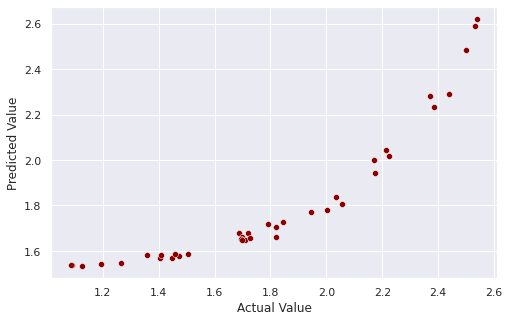

In [73]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_elastic_pred),color= 'darkred')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

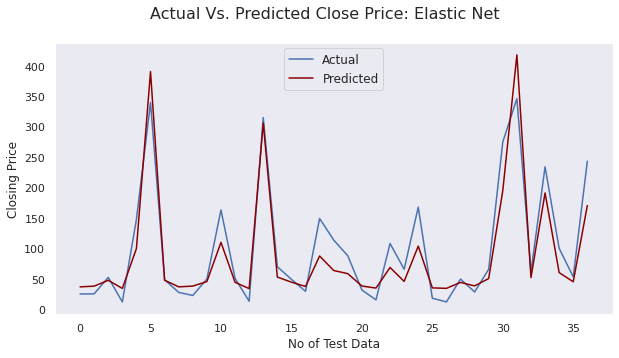

In [75]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred),color='darkred')
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

**Implementing Cross Validation of Elastic Net**

In [76]:
# Hyper-Parameter Tuning for Elastic Net

elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [77]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [78]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.01 0.3
The negative mean squared error for is:  -0.035


In [79]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic1

array([1.51815911, 1.53423079, 1.64987038, 1.48138556, 2.03057797,
       2.73348455, 1.65128622, 1.51865656, 1.53526397, 1.62648991,
       2.08059152, 1.61317337, 1.47664059, 2.60770449, 1.70459064,
       1.61585199, 1.52711333, 1.96292383, 1.79968144, 1.75613483,
       1.53733033, 1.48926834, 1.83790909, 1.63023997, 2.05066757,
       1.49393678, 1.48299273, 1.61095395, 1.53977935, 1.68036832,
       2.37535386, 2.76853613, 1.69575122, 2.36532819, 1.77105854,
       1.62350517, 2.30620735])

In [119]:
# Test Performance of Elastic Net model after validation
print("MSE-enm :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("RMSE-enm :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("MAE-enm:",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("MAPE-enm :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2-enm :",round(r2_score(y_test, y_pred_elastic1), 4))

MSE-enm : 0.0324
RMSE-enm : 0.1799
MAE-enm: 0.1526
MAPE-enm : 0.0963
R2-enm : 0.8181


Text(0, 0.5, 'Predicted Value')

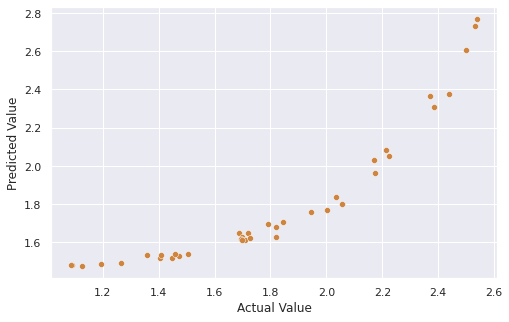

In [81]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_elastic1),color='peru')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

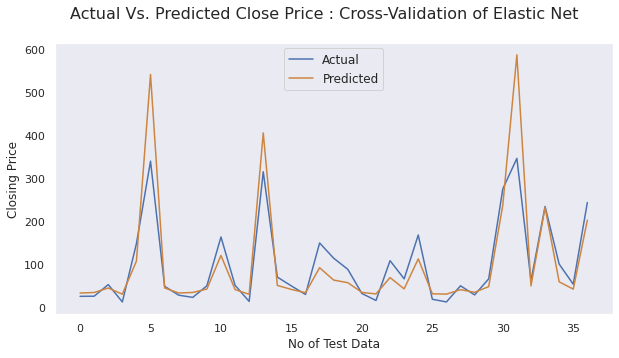

In [82]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1),color='peru')
plt.suptitle('Actual Vs. Predicted Close Price : Cross-Validation of Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Implementing XG Boost Regression**

XGBoost is a powerful approach for building supervised regression models.The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values. The most common loss functions in XGBoost for regression problems is reg:linear, and that for binary classification is reg:logistics. Ensemble learning involves training and combining individual models (known as base learners) to get a single prediction, and XGBoost is one of the ensemble learning methods. XGBoost expects to have the base learners which are uniformly bad at the remainder so that when all the predictions are combined, bad predictions cancels out and better one sums up to form final good predictions.

XGBoost stands for “Extreme Gradient Boosting”. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [87]:
# fitting the data into XGBoost Regressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[16:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [88]:
xgb.score(X_train,y_train)

0.9947547884986473

In [89]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3957924, 1.4875495, 1.7467052, 1.1844509, 2.2275252, 2.5172467,
       1.7467052, 1.3957924, 1.4875495, 1.7359629, 2.2322483, 1.768805 ,
       1.140053 , 2.473123 , 1.8509994, 1.768805 , 1.4287281, 2.1634965,
       1.9846522, 1.9478581, 1.4875495, 1.2511318, 2.0443716, 1.7359629,
       2.2275252, 1.2756321, 1.1844509, 1.6936659, 1.4875495, 1.842386 ,
       2.4160779, 2.545327 , 1.8509994, 2.4160779, 1.9511954, 1.7359629,
       2.3300524], dtype=float32)

In [90]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [120]:
# Test Performance of XGBoost model after validation

print("MSE-xgb :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("RMSE-xgb :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("MAE-xgb :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("MAPE-xgb :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2-xgb :",round(r2_score(y_test, y_pred_XG), 4))

MSE-xgb : 0.0026
RMSE-xgb : 0.0508
MAE-xgb : 0.0397
MAPE-xgb : 0.0252
R2-xgb : 0.9855


Text(0, 0.5, 'Predicted Value')

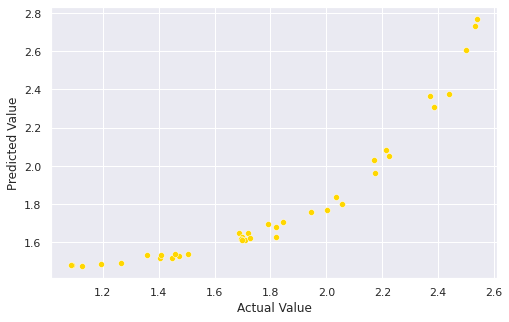

In [93]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
sns.scatterplot((y_test),(y_pred_elastic1),color='gold')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

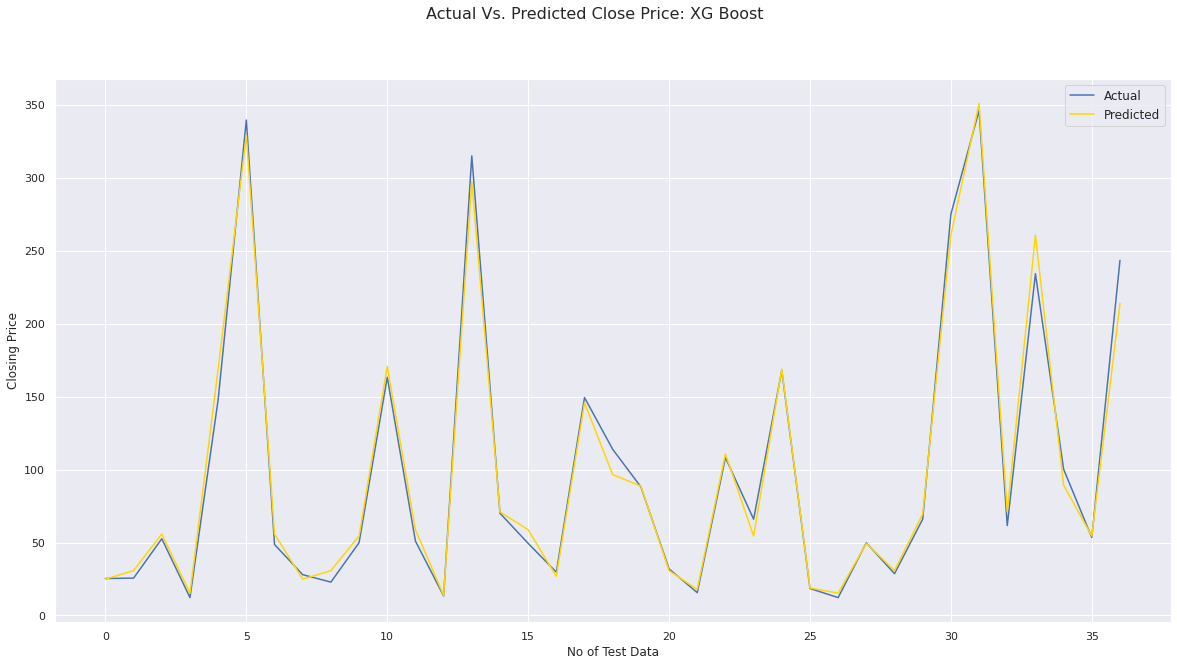

In [95]:
# Actual Price vs. Predicted Price for XGboost after Validation Plotting 
plt.figure(figsize=(20,10))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG),color='gold')
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)

**Summary**

In [123]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df

In [124]:
models=[regressor,ridge,lasso1,elastic_reg,xgb]

In [125]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

[16:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
4,XGBRegressor,0.040,0.003,0.051,2.516,0.986
0,LinearRegression,0.152,0.032,0.179,9.572,0.819
1,Ridge,0.152,0.032,0.180,9.595,0.819
2,Lasso,0.152,0.032,0.180,9.624,0.818
3,ElasticNet,0.159,0.038,0.195,10.382,0.787


# **Conclusion**

-The popularity of stock closing is growing extremely rapidly day by day which encourage researcher to find new methods if any fraud happens.

-This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

-In this work we use linear regression technique, lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these five models gives us the following results

-High, low, open are directly correlate with the closing price of stocks

-Target variable(dependent variable) strongly dependent on independent variables

-Xgboost regression is best model for yes bank stock closing price data this model use for further prediction-